In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [108]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w_star = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx)),tx.T),y)
    mse = np.sqrt(2*sum((y - np.dot(tx, w_star))**2)/(2*len(y)))
    return mse, w_star
    raise NotImplementedError

In [109]:
from helpers import *
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [110]:
least_squares(y,tx)

(5.5472313578630299, array([ 73.293922  ,  13.47971243]))

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [111]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    gradient = (-1/len(y))*np.dot(tx.T, y - np.dot(tx,w))
    # ***************************************************
    print(gradient)
    return gradient
    raise NotImplementedError

In [112]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    res = y - np.dot(tx,w)
    mse = (np.dot(res.T,res)/(2*len(y)))
    
    return mse
    # ***************************************************
    raise NotImplementedError

In [113]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y, tx, w)
        
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
#         raise NotImplementedError
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        

    return losses, ws

In [114]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    ls_mse, ls_w_star = least_squares(y,tx)
    gd_losses, gd_ws = gradient_descent(y,tx, initial_w=[0,0], max_iters=500, gamma=0.7)
    gd_mse = gd_losses[-1]
    gd_w_star = gd_ws[-1]
    print(ls_mse, ls_w_star)
    print(gd_mse, gd_w_star)
#     raise NotImplementedError

Test it here

In [115]:
test_your_least_squares()

[-73.293922   -13.47971243]
Gradient Descent(0/499): loss=2792.236712759167, w0=51.305745401473644, w1=9.435798704492269
[-21.9881766   -4.04391373]
Gradient Descent(1/499): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
[-6.59645298 -1.21317412]
Gradient Descent(2/499): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
[-1.97893589 -0.36395224]
Gradient Descent(3/499): loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
[-0.59368077 -0.10918567]
Gradient Descent(4/499): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
[-0.17810423 -0.0327557 ]
Gradient Descent(5/499): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
[-0.05343127 -0.00982671]
Gradient Descent(6/499): loss=15.387363601208632, w0=73.27789262136334, w1=13.476764421879516
[-0.01602938 -0.00294801]
Gradient Descent(7/499): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
[-0.00480881 -0.0008844 ]
Gradient Descen

Gradient Descent(346/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(347/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(348/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(349/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(350/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(351/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(352/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
[  2.18278728e-15  -1.02318154e-16]
Gradient Descent(353/499): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [116]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [125]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    x = np.array(x)
    phi = np.ones([len(x), 1])

    for i in range(degree):
        phi = np.c_[phi, x**(i+1)]
    
    return phi
    raise NotImplementedError
    
# build_poly([1,2,3], 12).shape

(3, 13)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [161]:
# from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
        
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        rmse, weights = least_squares(y,tx)
#         raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.2496587036090856
Processing 4th experiment, degree=12, rmse=1.4371532813243226


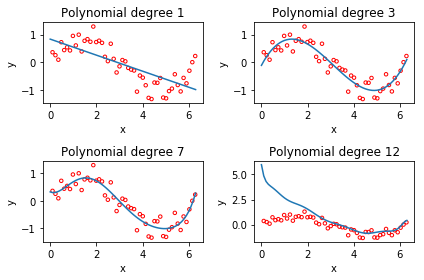

In [162]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [121]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    data_size = len(y)
    train_size = int(np.floor(data_size*ratio))
    
    shuffled_ind = np.random.permutation(np.arange(data_size))
    
    train_x = x[shuffled_ind][0:train_size]
    train_y = y[shuffled_ind][0:train_size]
    test_x = x[shuffled_ind][train_size:]
    test_y = y[shuffled_ind][train_size:]
    return train_x, train_y, test_x, test_y
    raise NotImplementedError

Then, test your `split_data` function below.

In [122]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
#     tx = build_poly(x, degree)
    train_x, train_y, test_x, test_y = split_data(x,y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    rmse_tr, w_star = least_squares(train_y, train_tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    
    rmse_te = np.sqrt(2*sum((test_y - np.dot(test_tx, w_star))**2)/(2*len(test_y)))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [123]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.406, Testing RMSE=0.433
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.328, Testing RMSE=1.412
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=4.466, Testing RMSE=3.909
proportion=0.1, degree=12, Training RMSE=101.561, Testing RMSE=79.809


# 3 Ridge Regression
Please fill in the function below.

In [156]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_star = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx) + lambda_*2*tx.shape[0]*np.eye(tx.shape[1])),tx.T),y)
    mse = np.sqrt(2*sum((y - np.dot(tx, w_star))**2)/(2*len(y)))
    
    return mse, w_star
    raise NotImplementedError

In [175]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, train_y, test_x, test_y = split_data(x,y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************

    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)       

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        rmse, w_star = ridge_regression(train_y, train_tx, lambda_)
        
        rmse_tr.append(rmse)
        rmse_te.append(np.sqrt(2*sum((test_y - np.dot(test_tx, w_star))**2)/(2*len(test_y))))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

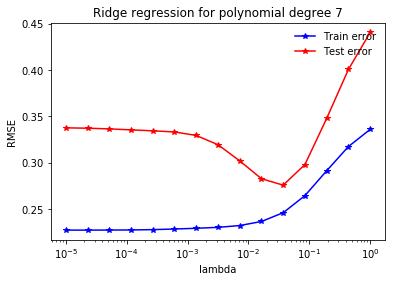

In [182]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [173]:
lambdas = np.logspace(-5, 5, 15)
lambdas

array([  1.00000000e-05,   5.17947468e-05,   2.68269580e-04,
         1.38949549e-03,   7.19685673e-03,   3.72759372e-02,
         1.93069773e-01,   1.00000000e+00,   5.17947468e+00,
         2.68269580e+01,   1.38949549e+02,   7.19685673e+02,
         3.72759372e+03,   1.93069773e+04,   1.00000000e+05])